<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/VNd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras import preprocessing
from tensorflow.keras.utils import load_img, img_to_array


In [5]:
tien_folder = "/content/drive/MyDrive/tien/"

In [6]:

print("Bắt đầu xử lý ảnh...")

pixels,labels=list(),list()

for folder in listdir(tien_folder):
    if folder!='.DS_Store':
        #print("Folder=",folder)
        for file in listdir(tien_folder  + folder):
            if file!='.DS_Store':
                #print("File=", file)
                pixel=load_img(tien_folder  + folder +"/" + file)
                pixel=img_to_array(pixel)
                pixels.append(pixel)
                labels.append( folder)

pixels =asarray(pixels)
labels =asarray(labels)#.reshape(-1,1)

Bắt đầu xử lý ảnh...


In [ ]:
#save('tien.npy',pixels)
#save('tien.npy',labels)

In [7]:
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.model_selection import train_test_split
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
#print(labels)

file = open('pix.data', 'wb')
# dump information to that file
pickle.dump((pixels,labels), file)
# close the file
file.close()

In [8]:
def load_data():
    file = open('pix.data', 'rb')
    # dump information to that file
    (pixels, labels) = pickle.load(file)
    # close the file
    file.close()
    return pixels, labels

#save_data()
X,y = load_data()
#random.shuffle(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

(6725, 144, 192, 3)
(1682, 144, 192, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.ma.core import reshape

X_train = X_train.reshape(6725,144,192,3)
X_test= X_test.reshape(1682,144,192,3)

In [ ]:
X_train= X_train.astype('float32')/255
print(y_train.shape)
X_test= X_test.astype('float32')/255

#from keras.utils import to_categorical 
#y_train= to_categorical(y_train,10)
#print(y_train.shape)
#y_test= to_categorical(y_test,10)


(328, 10)


In [ ]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=64 #lô
epochs=20     #số lần học
classes=10    #phân loại

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(144,192,3),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_53 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_tien.h5")

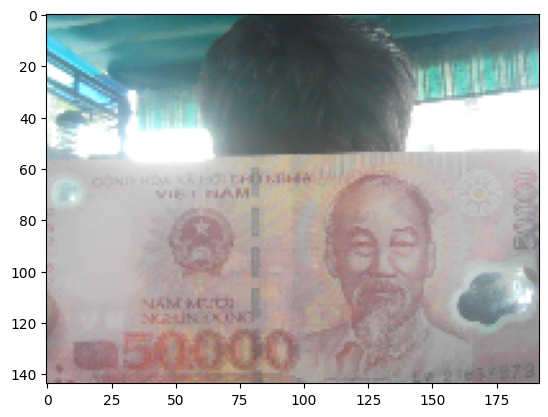

In [ ]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model100=load_model("/content/drive/MyDrive/Colab Notebooks/BT/nhan_dien_tien.h5")
img=load_img('/content/drive/MyDrive/tien/50000/61.png')
plt.imshow(img)
plt.show()

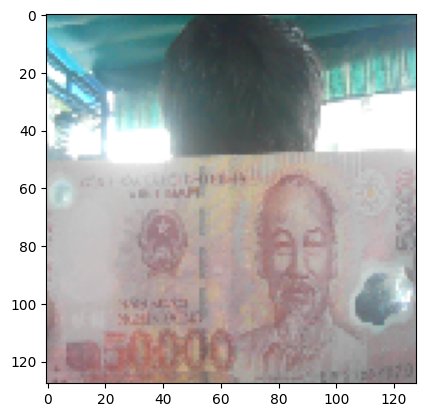

In [ ]:
img = load_img('/content/drive/MyDrive/tien/50000/61.png',target_size=(144,192))
plt.imshow(img)

In [ ]:
import numpy as np
class_name = ['00000','1000','2000','5000','10000','20000','50000','100000','200000','500000']
img=img_to_array(img)
img=img.reshape(1,144,192,3)
img=img.astype('float32')
img=img/255
predict = model100.predict(img)
print("This picture is: ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 69ms/step
This picture is:  200000 [8.5390639e-08 6.1699916e-02 2.9612340e-07 1.9380718e-04 8.2389661e-04
 3.9666073e-05 5.3486161e-08 4.5560392e-10 9.3724227e-01 2.2293306e-10]
0.93724227
